In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


In [5]:
def simulate_setar(N, a01=1.0, a11=0.6, a02=-1.0, a12=0.4, seed=42):
    np.random.seed(seed)
    eps = np.random.randn(N)
    x = np.empty(N)
    x[0] = eps[0]  # Initialize with noise

    for t in range(1, N):
        if x[t-1] <= 0:
            x[t] = a01 + a11 * x[t-1] + eps[t]
        else:
            x[t] = a02 + a12 * x[t-1] + eps[t]
    return x, eps


In [2]:
def setar_model(theta, x, eps, a01=1.0, a02=-1.0):
    a11, a12 = theta
    y_hat = np.empty_like(x)
    y_hat[0] = x[0]  # Initial value

    for t in range(1, len(x)):
        if x[t-1] <= 0:
            y_hat[t] = a01 + a11 * x[t-1] + eps[t]
        else:
            y_hat[t] = a02 + a12 * x[t-1] + eps[t]
    return y_hat


In [3]:
def residuals(theta, x, eps, true_x):
    pred = setar_model(theta, x, eps)
    return pred - true_x


In [6]:
# Simulate data
N = 1000
true_x, eps = simulate_setar(N)

# Initial guess for [a11, a12]
theta0 = [0.0, 0.0]

# Minimize prediction error
res = least_squares(residuals, theta0, args=(true_x, eps, true_x), verbose=2)


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8015e+02                                    4.24e+02    
       1              2         6.7063e-19      1.80e+02       7.21e-01       2.97e-08    
       2              3         0.0000e+00      6.71e-19       4.50e-11       0.00e+00    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 1.8015e+02, final cost 0.0000e+00, first-order optimality 0.00e+00.


In [7]:
print(f"Estimated a11 (theta[0]): {res.x[0]:.6f}")
print(f"Estimated a12 (theta[1]): {res.x[1]:.6f}")


Estimated a11 (theta[0]): 0.600000
Estimated a12 (theta[1]): 0.400000


In [13]:
print(f"Estimated a11 (theta[0]): {res.x[0]}")
print(f"Estimated a12 (theta[1]): {res.x[1]}")


Estimated a11 (theta[0]): 0.6
Estimated a12 (theta[1]): 0.4


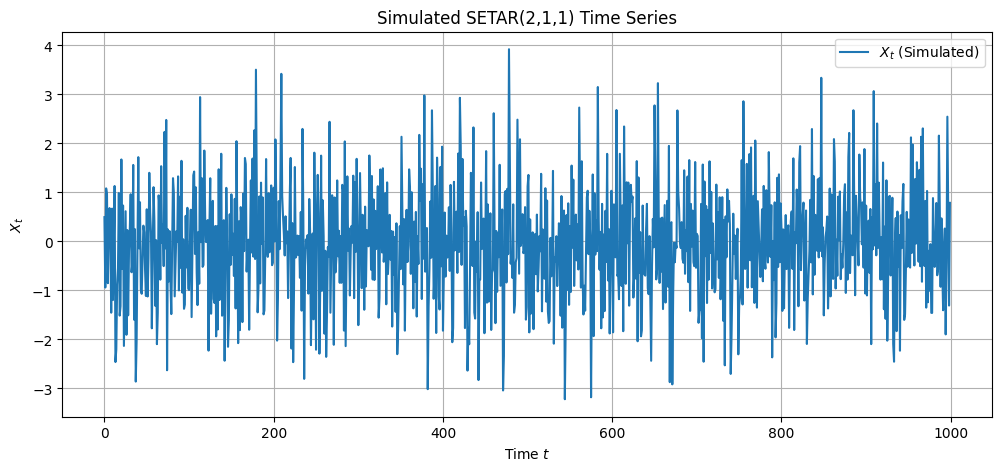

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(true_x, label='$X_t$ (Simulated)', color='tab:blue')
plt.title("Simulated SETAR(2,1,1) Time Series")
plt.xlabel("Time $t$")
plt.ylabel("$X_t$")
plt.grid(True)
plt.legend()
plt.show()